In [129]:
class Node:

    def __init__(self, index):
        self.parent = None
        self.children = {}
        self.fail = None
        self.good_suff_link = None
        self.edge = None
        self.index = index
        self.key = None
        self.out = []
          
class Suff_tree:
    
    def __init__(self, alphabet):
        self.root = Node(index=0)
        self.root.fail = self.root
        self.root.good_suff_link = self.root
        self.nodes = 0
        
    def add(self, in_list):
        for word in in_list:
            path_string = ""
            node = self.root
            state = 0
            c = 1
            flag = False
            for i in list(word):
                if c == len(list(word)):
                    flag = True
                c += 1
                path_string += i
                if i in node.children.keys():
                    node = node.children[i]
                    
                else:
                    state += 1
                    self.nodes += 1
                    node.children[i] = Node(index=self.nodes)
                    old_node = node
                    node = node.children[i]
                    node.parent = old_node
                    node.edge = path_string
                    if flag == True:
                        node.key = True
                        node.out.append(path_string)
                    else:
                        node.key = False
                    
    def find_suff_links(self):
        root = self.root
        queue = []
        for child in root.children.values():
            queue.append(child)
            child.fail = root
    
        while len(queue) > 0:
            rnode = queue.pop(0)
            for key, unode in rnode.children.items():
                queue.append(unode)
                fnode = rnode.fail
                while fnode != root and key not in fnode.children.keys():
                    fnode = fnode.fail
                if key in fnode.children.keys():
                    unode.fail = fnode.children[key]
                else:
                    unode.fail = root
                unode.out += unode.fail.out
        return root
    
    
    def visualize(self):
        root = self.root
        print(root.index, root.children.keys())
        queue = []
        for child in root.children.values():
            queue.append(child)
            print(queue, child.index, child.children.keys())
    
        while len(queue) > 0:
            rnode = queue.pop(0)
            print(rnode.index, rnode.children.keys())
            for key, unode in rnode.children.items():
                queue.append(unode)

                
    def to_Suff_tree(self, curr_node):
        #print(curr_node)
        #print(curr_node.index)
        
        flag = True
        while flag == True:
            flag = False
            
            keys = list(curr_node.children.keys())
            #print(keys)
            if len(keys) > 0:
                for node in range(len(keys)):
                    if len(curr_node.children[keys[node]].children) == 1:
                        new = keys[node] + list(curr_node.children[keys[node]].children.keys())[0]
                        curr_node.children[new] = list(curr_node.children[keys[node]].children.values())[0]
                        del curr_node.children[keys[node]]
            
            for i in curr_node.children.keys():
                if len(curr_node.children[i].children) == 1:
                    flag = True
                    
        for child in curr_node.children.values():
            self.to_Suff_tree(child)
            
            
            
    def search(self, text):
        node = self.root
        found = []
    
        for i in range(len(text)):
            while node != self.root and text[i] not in node.children.keys():
                node = node.fail
            if text[i] not in node.children.keys():
                continue
            else:
                node = node.children[text[i]]
            if node.key == True:
                found.append(i - len(node.out[0]) + 1)
        print(found)
        return found 

in_string = "bananas" 
temp_str = ""
in_list = ["$"]
for i in list(in_string):
    temp_str += i
    in_list.append(temp_str + "$")

print(in_list)
alphabet = "bnas$"
text = "bananasnannasnnasnbbabansbbanabas"


ST = Suff_tree(alphabet)
ST.add(in_list)
ST.visualize()
ST.find_suff_links()
#ST.search(text)
print("")
ST.to_Suff_tree(ST.root)
print("")
ST.visualize()

['$', 'b$', 'ba$', 'ban$', 'bana$', 'banan$', 'banana$', 'bananas$']
0 dict_keys(['$', 'b'])
[<__main__.Node object at 0x7fb3e41f6390>] 1 dict_keys([])
[<__main__.Node object at 0x7fb3e41f6390>, <__main__.Node object at 0x7fb3e41f6358>] 2 dict_keys(['$', 'a'])
1 dict_keys([])
2 dict_keys(['$', 'a'])
3 dict_keys([])
4 dict_keys(['$', 'n'])
5 dict_keys([])
6 dict_keys(['$', 'a'])
7 dict_keys([])
8 dict_keys(['$', 'n'])
9 dict_keys([])
10 dict_keys(['$', 'a'])
11 dict_keys([])
12 dict_keys(['$', 's'])
13 dict_keys([])
14 dict_keys(['$'])
15 dict_keys([])


0 dict_keys(['$', 'b'])
[<__main__.Node object at 0x7fb3e41f6390>] 1 dict_keys([])
[<__main__.Node object at 0x7fb3e41f6390>, <__main__.Node object at 0x7fb3e41f6358>] 2 dict_keys(['$', 'a'])
1 dict_keys([])
2 dict_keys(['$', 'a'])
3 dict_keys([])
4 dict_keys(['$', 'n'])
5 dict_keys([])
6 dict_keys(['$', 'a'])
7 dict_keys([])
8 dict_keys(['$', 'n'])
9 dict_keys([])
10 dict_keys(['$', 'a'])
11 dict_keys([])
12 dict_keys(['$', 's$'])
13 d

Реализовать  суффиксный массив (построение и поиск в нем). (2 балла)


In [11]:
def suffix_array_alternative_naive(s):
    return ["$"] + [suffix for suffix, rank in sorted((s[i:] + "$", i) for i in range(len(s)))]

li = suffix_array_alternative_naive("asantesanasquashbanana!")
print(li)

['$', '!$', 'a!$', 'ana!$', 'anana!$', 'anasquashbanana!$', 'antesanasquashbanana!$', 'asantesanasquashbanana!$', 'ashbanana!$', 'asquashbanana!$', 'banana!$', 'esanasquashbanana!$', 'hbanana!$', 'na!$', 'nana!$', 'nasquashbanana!$', 'ntesanasquashbanana!$', 'quashbanana!$', 'sanasquashbanana!$', 'santesanasquashbanana!$', 'shbanana!$', 'squashbanana!$', 'tesanasquashbanana!$', 'uashbanana!$']


In [78]:
def BinSearch(li, x):
    i = 0
    j = len(li)-1
    m = int(j/2)
    while li[m] != x and i < j:
        if x > li[m]:
            i = m+1
        else:
            j = m-1
        m = int((i+j)/2)
    if i > j:
        return -1
    else:
        return m
    
BinSearch(li, "banana!$")

10

In [13]:
def suffix_array_alternative_naive(s):
    return [rank for suffix, rank in sorted((s[i:], i) for i in range(len(s)))]

suffix_array_alternative_naive('banana$')

[6, 5, 3, 1, 0, 4, 2]

In [7]:
class Node:

    def __init__(self):
        self.children = {}
        self.index = None
        self.key = None
        self.out = []
        self.name = None
          
            
class Suff_trie:
    
    def __init__(self):
        self.root = Node()
        self.number = 0
        self.root.name = self.number
        self.found = []
        
    def add(self, text):
        text = text + "$"
        for i in range(0,len(text)):
            #print("--i", text[i])
            temp_str = ""
            curr_node = self.root
            for j in range(i,len(text)):
                temp_str += text[j] 
                #print("j", text[j])
                curr_symbol = text[j]
                #print(curr_node.children.keys())
                if curr_symbol in curr_node.children.keys():
                    curr_node = curr_node.children[curr_symbol]
                    
                else:
                    self.number += 1
                    curr_node.children[curr_symbol] = Node()
                    curr_node = curr_node.children[curr_symbol]
                    curr_node.name = self.number
                    
                if j == len(text)-1:
                    curr_node.index = i
                    curr_node.key = True
                    curr_node.out.append(temp_str)
                    #print(curr_node.index)
            
            
    def to_Suff_tree(self, curr_node):
        #print(curr_node)
        #print(curr_node.index)
        flag = True
        while flag == True:
            flag = False
            children_dict = curr_node.children
            keys = list(children_dict.keys())
            #print(keys)
            if len(keys) > 0:
                for node in keys:
                    if len(children_dict[node].children.keys()) == 1:
                        new = node + list(children_dict[node].children.keys())[0]
                        children_dict[new] = list(children_dict[node].children.values())[0]
                        del children_dict[node]
            
            for node in children_dict.keys():
                if len(children_dict[node].children) == 1:
                    flag = True
                    
        for child in curr_node.children.values():
            self.to_Suff_tree(child)
     
        
    def visualize(self):
        root = self.root
        print(root.name, root.index, root.children.keys())
        queue = []
        for child in root.children.values():
            queue.append(child)
    
        while len(queue) > 0:
            rnode = queue.pop(0)
            print(rnode.name, rnode.index, rnode.children.keys())
            for key, unode in rnode.children.items():
                queue.append(unode)
            
        
    
    def search(self, curr_node, p):
        def all_nodes(curr_node_children):
            if curr_node_children.key == None:
                print("False")
            else:
                print("True")
                self.found.append(curr_node_children.out[0])
            if len(curr_node_children.children.keys()) > 0:
                for i in curr_node_children.children.values():
                    all_nodes(i)
            
        if len(curr_node.children.keys()) == 0:
            return -1
        else:
            flag = False
            for i in curr_node.children.keys():
                if p[0] == i[0]:
                    temp_node = i
                    flag = True
            if flag == False:
                return -1
            else:
                if len(p) <= len(temp_node):
                    if p == temp_node[:len(p)]:
                        all_nodes(curr_node.children[temp_node])
                    else:
                        return -1
                else:
                    if temp_node == p[:len(temp_node)]:
                        self.search(curr_node.children[temp_node], p[len(temp_node):])
                    else:
                        return -1
        #print(self.found)

        
    def sa_find(self):
        sa = []
        def collector(node):
            if len(node.children.keys()) != 0:
                for n, child in sorted(node.children.items()):
                    collector(child)
            else:
                sa.append(node.index)
        collector(self.root)
        return sa
   

    
text = "banana"
p = "bana"


ST = Suff_trie()
ST.add(text)
ST.visualize()
print("")
ST.to_Suff_tree(ST.root)
print("")
ST.visualize()
print("")
ST.search(ST.root, p)
print(ST.found)

ST.sa_find()

0 None dict_keys(['b', 'a', 'n', '$'])
1 None dict_keys(['a'])
8 None dict_keys(['n', '$'])
14 None dict_keys(['a'])
22 6 dict_keys([])
2 None dict_keys(['n'])
9 None dict_keys(['a'])
21 5 dict_keys([])
15 None dict_keys(['n', '$'])
3 None dict_keys(['a'])
10 None dict_keys(['n', '$'])
16 None dict_keys(['a'])
20 4 dict_keys([])
4 None dict_keys(['n'])
11 None dict_keys(['a'])
19 3 dict_keys([])
17 None dict_keys(['$'])
5 None dict_keys(['a'])
12 None dict_keys(['$'])
18 2 dict_keys([])
6 None dict_keys(['$'])
13 1 dict_keys([])
7 0 dict_keys([])


0 None dict_keys(['a', '$', 'na', 'banana$'])
8 None dict_keys(['$', 'na'])
22 6 dict_keys([])
15 None dict_keys(['$', 'na$'])
7 0 dict_keys([])
21 5 dict_keys([])
10 None dict_keys(['$', 'na$'])
20 4 dict_keys([])
18 2 dict_keys([])
19 3 dict_keys([])
13 1 dict_keys([])

True
['banana$']


[6, 5, 3, 1, 0, 4, 2]

Реализовать суффиксное дерево (построение и поиск в нем). (2 балла)

In [235]:
class Node:

    def __init__(self):
        self.children = {}
        self.index = None
        self.key = None
        self.out = []
        self.name = None
          
            
class Suff_trie:
    
    def __init__(self):
        self.root = Node()
        self.number = 0
        self.root.name = self.number
        self.found = []
        
    def add(self, text):
        text = text + "$"
        for i in range(0,len(text)):
            #print("--i", text[i])
            temp_str = ""
            curr_node = self.root
            for j in range(i,len(text)):
                temp_str += text[j] 
                #print("j", text[j])
                curr_symbol = text[j]
                #print(curr_node.children.keys())
                if curr_symbol in curr_node.children.keys():
                    curr_node = curr_node.children[curr_symbol]
                    
                else:
                    self.number += 1
                    curr_node.children[curr_symbol] = Node()
                    curr_node = curr_node.children[curr_symbol]
                    curr_node.name = self.number
                    
                if j == len(text)-1:
                    curr_node.index = i
                    curr_node.key = True
                    curr_node.out.append(temp_str)
                    #print(curr_node.index)
            
            
    def to_Suff_tree(self, curr_node):
        #print(curr_node)
        #print(curr_node.index)
        flag = True
        while flag == True:
            flag = False
            children_dict = curr_node.children
            keys = list(children_dict.keys())
            #print(keys)
            if len(keys) > 0:
                for node in keys:
                    if len(children_dict[node].children.keys()) == 1:
                        new = node + list(children_dict[node].children.keys())[0]
                        children_dict[new] = list(children_dict[node].children.values())[0]
                        del children_dict[node]
            
            for node in children_dict.keys():
                if len(children_dict[node].children) == 1:
                    flag = True
                    
        for child in curr_node.children.values():
            self.to_Suff_tree(child)
     
        
    def visualize(self):
        root = self.root
        print(root.name, root.index, root.children.keys())
        queue = []
        for child in root.children.values():
            queue.append(child)
    
        while len(queue) > 0:
            rnode = queue.pop(0)
            print(rnode.name, rnode.index, rnode.children.keys())
            for key, unode in rnode.children.items():
                queue.append(unode)
            
        
    
    def search(self, curr_node, p):
        def all_nodes(curr_node_children):
            if curr_node_children.key == None:
                print("False")
            else:
                print("True")
                self.found.append(curr_node_children.out[0])
            if len(curr_node_children.children.keys()) > 0:
                for i in curr_node_children.children.values():
                    all_nodes(i)
            
        if len(curr_node.children.keys()) == 0:
            return -1
        else:
            flag = False
            for i in curr_node.children.keys():
                if p[0] == i[0]:
                    temp_node = i
                    flag = True
            if flag == False:
                return -1
            else:
                if len(p) <= len(temp_node):
                    if p == temp_node[:len(p)]:
                        all_nodes(curr_node.children[temp_node])
                    else:
                        return -1
                else:
                    if temp_node == p[:len(temp_node)]:
                        self.search(curr_node.children[temp_node], p[len(temp_node):])
                    else:
                        return -1
        #print(self.found)


text = "banana"
p = "bana"


ST = Suff_trie()
ST.add(text)
ST.visualize()
print("")
ST.to_Suff_tree(ST.root)
print("")
ST.visualize()
print("")
ST.search(ST.root, p)
print(ST.found)

0 None dict_keys(['b', 'a', 'n', '$'])
1 None dict_keys(['a'])
8 None dict_keys(['n', '$'])
14 None dict_keys(['a'])
22 6 dict_keys([])
2 None dict_keys(['n'])
9 None dict_keys(['a'])
21 5 dict_keys([])
15 None dict_keys(['n', '$'])
3 None dict_keys(['a'])
10 None dict_keys(['n', '$'])
16 None dict_keys(['a'])
20 4 dict_keys([])
4 None dict_keys(['n'])
11 None dict_keys(['a'])
19 3 dict_keys([])
17 None dict_keys(['$'])
5 None dict_keys(['a'])
12 None dict_keys(['$'])
18 2 dict_keys([])
6 None dict_keys(['$'])
13 1 dict_keys([])
7 0 dict_keys([])


0 None dict_keys(['a', '$', 'na', 'banana$'])
8 None dict_keys(['$', 'na'])
22 6 dict_keys([])
15 None dict_keys(['$', 'na$'])
7 0 dict_keys([])
21 5 dict_keys([])
10 None dict_keys(['$', 'na$'])
20 4 dict_keys([])
18 2 dict_keys([])
19 3 dict_keys([])
13 1 dict_keys([])

True
['banana$']


Реализовать поиск наибольшего общего подслова в двух текстах при помощи суффиксного дерева (2 балла)


In [247]:
class Node:

    def __init__(self):
        self.children = {}
        self.index = None
        self.key = None
        self.out = []
        self.name = None
        self.color = None # green, red, blue
          
            
class Suff_trie:
    
    def __init__(self):
        self.root = Node()
        self.number = 0
        self.root.name = self.number
        self.found = []
        self.max_substring = [0,None]
        
    def add(self, text1, text2):
        text = text1 + "$"
        for i in range(0,len(text)):
            #print("--i", text[i])
            temp_str = ""
            curr_node = self.root
            for j in range(i,len(text)):
                temp_str += text[j] 
                #print("j", text[j])
                curr_symbol = text[j]
                #print(curr_node.children.keys())
                if curr_symbol in curr_node.children.keys():
                    curr_node = curr_node.children[curr_symbol]
                    
                else:
                    self.number += 1
                    curr_node.children[curr_symbol] = Node()
                    curr_node = curr_node.children[curr_symbol]
                    curr_node.name = self.number
                    curr_node.color = "green"
                    
                if j == len(text)-1:
                    curr_node.index = i
                    curr_node.key = True
                    curr_node.out.append(temp_str)
                    #print(curr_node.index)
                    
        text = text2 + "#"
        for i in range(0,len(text)):
            m = 0
            substr = ""
            temp_str = ""
            curr_node = self.root
            for j in range(i,len(text)):
                temp_str += text[j] 
                #print("j", text[j])
                curr_symbol = text[j]
                #print(curr_node.children.keys())
                if curr_symbol in curr_node.children.keys():
                    curr_node = curr_node.children[curr_symbol]
                    curr_node.color = "blue"
                    m += 1
                    substr += curr_symbol
                    
                else:
                    self.number += 1
                    curr_node.children[curr_symbol] = Node()
                    curr_node = curr_node.children[curr_symbol]
                    curr_node.name = self.number
                    curr_node.color = "red"
                    
                if j == len(text)-1:
                    curr_node.index = i
                    curr_node.key = True
                    curr_node.out.append(temp_str)
                    #print(curr_node.index)
            #print(self.max_substring)
            if m > self.max_substring[0]:
                self.max_substring = [m, substr]
            
    def to_Suff_tree(self, curr_node):
        #print(curr_node)
        #print(curr_node.index)
        flag = True
        while flag == True:
            flag = False
            children_dict = curr_node.children
            keys = list(children_dict.keys())
            #print(keys)
            if len(keys) > 0:
                for node in keys:
                    if len(children_dict[node].children.keys()) == 1:
                        new = node + list(children_dict[node].children.keys())[0]
                        children_dict[new] = list(children_dict[node].children.values())[0]
                        del children_dict[node]
            
            for node in children_dict.keys():
                if len(children_dict[node].children) == 1:
                    flag = True
                    
        for child in curr_node.children.values():
            self.to_Suff_tree(child)
     
        
    def visualize(self):
        root = self.root
        print(root.name, root.index, root.children.keys())
        queue = []
        for child in root.children.values():
            queue.append(child)
    
        while len(queue) > 0:
            rnode = queue.pop(0)
            print(rnode.name, rnode.index, rnode.children.keys())
            for key, unode in rnode.children.items():
                queue.append(unode)
            
        
    
    def search(self, curr_node, p):
        def all_nodes(curr_node_children):
            if curr_node_children.key == None:
                print("False")
            else:
                print("True")
                self.found.append(curr_node_children.out[0])
            if len(curr_node_children.children.keys()) > 0:
                for i in curr_node_children.children.values():
                    all_nodes(i)
            
        if len(curr_node.children.keys()) == 0:
            return -1
        else:
            flag = False
            for i in curr_node.children.keys():
                if p[0] == i[0]:
                    temp_node = i
                    flag = True
            if flag == False:
                return -1
            else:
                if len(p) <= len(temp_node):
                    if p == temp_node[:len(p)]:
                        all_nodes(curr_node.children[temp_node])
                    else:
                        return -1
                else:
                    if temp_node == p[:len(temp_node)]:
                        self.search(curr_node.children[temp_node], p[len(temp_node):])
                    else:
                        return -1
        #print(self.found)


text1 = "daabcdefcdebaabbaabcdefabcdefdaabcdefcde"
text2 = "baabbaabcdefabcdefdaabcdefcde"
#p = "bana"


ST = Suff_trie()
ST.add(text1, text2)
ST.visualize()
print("")
#ST.to_Suff_tree(ST.root)
#print("")
#ST.visualize()
#print("")
#ST.search(ST.root, p)
#print(ST.found)
print(ST.max_substring)

[29, 'baabbaabcdefabcdefdaabcdefcde']


Реализовать построение суффиксного массива за O(NLogN), без использования суффиксного дерева (2 балла)


In [ ]:
int[] sa = new int[n];
int[] classes = new int[n];

for (int i = 0; i < n; i++) {
  sa[i] = order[i];
  classes[i] = S.charAt(i);
}
// sa[i] - suffix on i'th position after sorting by first len characters
// classes[i] - equivalence class of the i'th suffix after sorting by first len characters

for (int len = 1; len < n; len *= 2) {
  int[] c = classes.clone();
  for (int i = 0; i < n; i++) {
    // condition sa[i - 1] + len < n simulates 0-symbol at the end of the string
    // a separate class is created for each suffix followed by simulated 0-symbol
    classes[sa[i]] = i > 0 && c[sa[i - 1]] == c[sa[i]] && sa[i - 1] + len < n && c[sa[i - 1] + len / 2] == c[sa[i] + len / 2] ? classes[sa[i - 1]] : i;
  }
  // Suffixes are already sorted by first len characters
  // Now sort suffixes by first len * 2 characters
  int[] cnt = new int[n];
  for (int i = 0; i < n; i++)
    cnt[i] = i;
  int[] s = sa.clone();
  for (int i = 0; i < n; i++) {
    // s[i] - order of suffixes sorted by first len characters
    // (s[i] - len) - order of suffixes sorted only by second len characters
    int s1 = s[i] - len;
    // sort only suffixes of length > len, others are already sorted
    if (s1 >= 0)
      sa[cnt[classes[s1]]++] = s1;
  }
}
return sa;
}

In [15]:
import collections

def sort_bucket(str, bucket, order): 
        d = collections.defaultdict(list) 
        for i in bucket: 
            key = str[i:i+order] 
            d[key].append(i) 
        result = [] 
        for k,v in sorted(d.items()): 
            if len(v) > 1: 
                result += sort_bucket(str, v, order*2) 
            else: 
                result.append(v[0]) 
        return result 
 
def suffix_array_ManberMyers(str): 
    return sort_bucket(str, (i for i in range(len(str))), 1) 

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import random
import time

suffix_array_ManberMyers("mississipi")

    
    

AttributeError: module 'pandas' has no attribute '_libs'

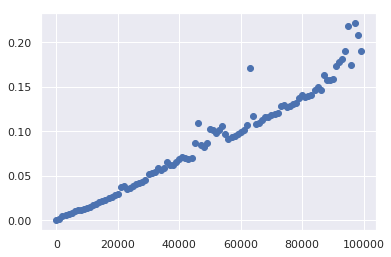

In [52]:
x, y = Lengthes, Times
plt.plot(x, y, "bo")
plt.show()

In [45]:
def suffix_array_alternative_naive(s):
    return ["$"] + [rank for suffix, rank in sorted((s[i:] + "$", i) for i in range(len(s)))]

li = suffix_array_alternative_naive("mississipi")
print(li)

['$', 9, 7, 4, 1, 0, 8, 6, 3, 5, 2]


In [8]:
import random 
seq = [random.choice("ATGC") for i in range(1000)]
print("".join(seq))

CTGAAGATACAGATAGCGAAGAACCCCCTAACGTAGTATAGATGGATAGCTACCTGGTTAGAAGTGGGACTACCAGATAAGACTGTTGTAATGGCAATAACTCTTTGGATAATTAGAATATACGGCGCACGTCTCTTGACGGATTGGAGGCTTCCCCGATGGATTAGCAGTTGGAGAAGCCCTCTAGTGTAGTCGTATATTACGGATTCCCTTATTACCCAAAGCAATGAGCTGCATGTATTCAGTGACCGAATATGGGTCAGTTTATTCAATACTTCTATTGGCACGTAGGCGATTCGCCTGCCAGCACACCACCTCCCAATCTTGACCTAACCCTCATGGGCCCGTTATGTCGGGCTCTCTTATATGCTTAATAGCTCACAATTTAGTAGTACCTAAGTAGACGTTCTAGGAGTATGCGGGTTAGCTCATAGGGTCACCCGGATATTGGCTCTCGCAGCGCTTCCGAAAACTAAGGGCGTCAGTTTGATGAGTCACCAAACACTGTAGGACCGTCTAGTAATCCTTTCAGTTTCGCTCGGAAAATGAATTCAGGAATCGACTGCCTGTAACTTTTGCCAATAATTCGCAGACACTGGCAAATCCTTCGCGCCATTCTGCATTCGCACTTGGCCTGGGACACTGCTACATACTATAGTTACAACAACGGCCTTAATGCATGCGGCAGTTTGGTCGGGCTGATGGACTCCCGATACCGTGGGAGCCTGATACAGGAGGTTTTTGGTGCCCGATGAGTCAGTCTCAACGTCGTTGGACTATTGCCCGTCCTGAATTGAAATTATAATATGACTGCTAGAGTCTCGCTTACGCGTACGCGGTCCACCAGGGCACACTAACAGCATCCACAGAGTAGTTCTGCTAAGACTCTGGCAGATGGATTCCAAGTAGGTCTTTGTTTGGCTGCTTATTGAGTACATTTGGATGGATTAGTTCTCCACTAAAGAGTGTCCCTATAGAGGGGCCTATCTACCGCTTTATC